Saving kc_house_data.csv to kc_house_data (1).csv


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

📈 Cross-Validation Summary:


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

,Model,R² Mean,R² Std,RMSE Mean,RMSE Std
0,KNN,0.786269,0.017284,NaN,NaN
1,Decision Tree,0.745335,0.022924,NaN,NaN
2,Random Forest,0.878420,0.007486,NaN,NaN
3,XGBoost,0.887254,0.006310,NaN,NaN


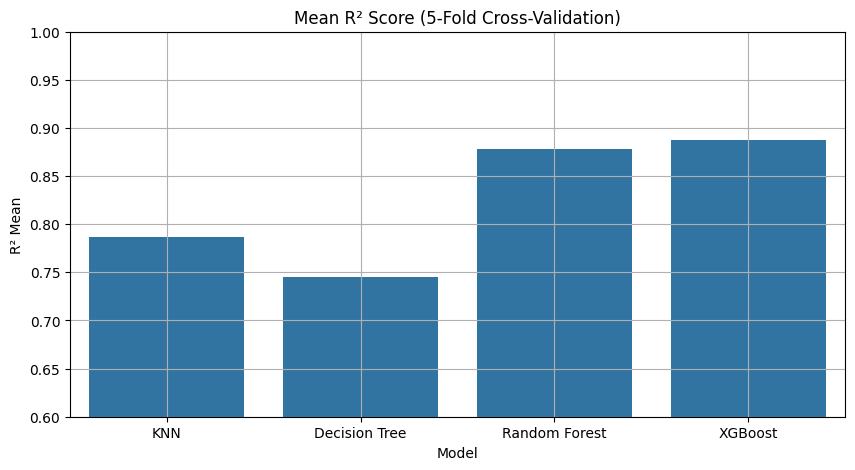

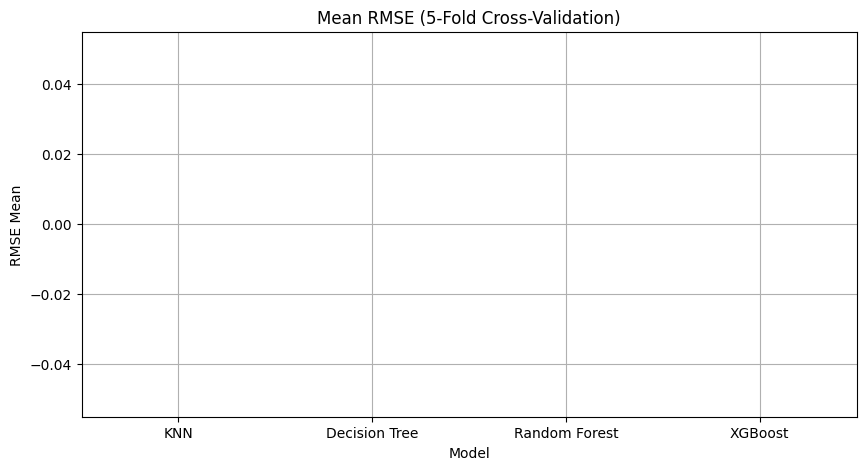

✅ Results saved to cross_validation_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# ✅ 1. Upload the CSV file from your computer
from google.colab import files
uploaded = files.upload()  # Choose kc_house_data.csv

# ✅ 2. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 3. Load & clean dataset
df = pd.read_csv("kc_house_data.csv")
df = df.drop_duplicates()
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]
df = df.drop(columns=['id', 'date'])

# ✅ 4. Features & target
X = pd.get_dummies(df.drop(columns='price'), drop_first=True)
y = df['price']
X_scaled = StandardScaler().fit_transform(X)  # for KNN

# ✅ 5. Define models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# ✅ 6. Cross-validation loop
results = []
for name, model in models.items():
    input_X = X_scaled if name == "KNN" else X
    r2_scores = cross_val_score(model, input_X, y, cv=5, scoring='r2')
    rmse_scores = -cross_val_score(model, input_X, y, cv=5,
                                   scoring=make_scorer(mean_squared_error, squared=False))
    results.append({
        "Model": name,
        "R² Mean": np.mean(r2_scores),
        "R² Std": np.std(r2_scores),
        "RMSE Mean": np.mean(rmse_scores),
        "RMSE Std": np.std(rmse_scores)
    })

# ✅ 7. Results as DataFrame
cv_df = pd.DataFrame(results)
print("📈 Cross-Validation Summary:")
display(cv_df)

# ✅ 8. Visualizations
plt.figure(figsize=(10, 5))
sns.barplot(data=cv_df, x="Model", y="R² Mean")
plt.title("Mean R² Score (5-Fold Cross-Validation)")
plt.ylim(0.6, 1)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=cv_df, x="Model", y="RMSE Mean")
plt.title("Mean RMSE (5-Fold Cross-Validation)")
plt.grid(True)
plt.show()

# ✅ 9. Export results as CSV
cv_df.to_csv("cross_validation_results.csv", index=False)
print("✅ Results saved to cross_validation_results.csv")

# ✅ 10. Download the results to your computer
files.download("cross_validation_results.csv")
